In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/global-carbon-budget/master/data/global-carbon-budget.csv')

In [10]:
df_hist = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/global-carbon-budget/master/data/historical-budget.csv')

In [13]:
df.columns = ['year', 'FF', 'LU',
       'atm', 'oc', 'ld', 'residual']

In [14]:
df['AF'] = df.atm/(df.FF + df.LU)

In [34]:
df['FF_2'] = np.concatenate([[0, 0] ,df['FF'][:-2]])
df['FF_1'] = np.concatenate([[0 ] ,df['FF'][:-1]])
df['LU_2'] = np.concatenate([[0, 0] ,df['LU'][:-2]])
df['LU_1'] = np.concatenate([[0 ] ,df['LU'][:-1]])

In [35]:
df['oc'] = -df['oc']
df['ld'] = -df['ld']

In [50]:
X = df.loc[:, ~(df.columns).isin(['atm', 'AF'])]
Y = df['atm']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [51]:
len(X_train)

44

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [53]:
lin_reg.fit(X_train, y_train)
y_preds = lin_reg.predict(X_test)
lin_reg.score(X_test, y_test)

0.99999780875679412

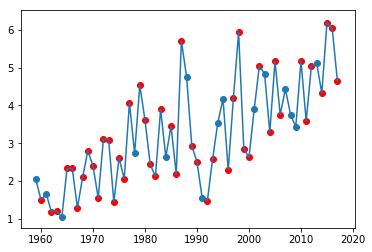

In [54]:
plt.scatter(X_test['year'], y_preds)
plt.scatter(X_train['year'], y_train, c = 'r')
plt.plot(df['year'], df['atm'])